In [32]:
from transformers import GPT2LMHeadModel

In [33]:
model = GPT2LMHeadModel.from_pretrained('gpt2') # 124M
state = model.state_dict()
for key, value in state.items():
    print(key, value.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [34]:
state["transformer.wte.weight"].view(-1)[:10]

tensor([-0.1101, -0.0393,  0.0331,  0.1338, -0.0485, -0.0789, -0.2398, -0.0895,
         0.0253, -0.1074])

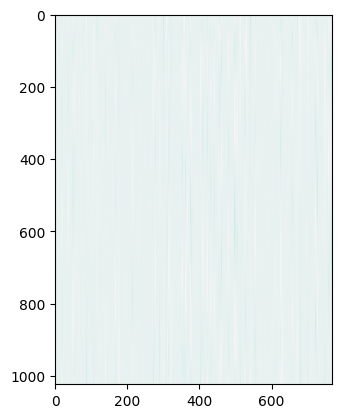

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(state["transformer.wpe.weight"], cmap="BrBG")

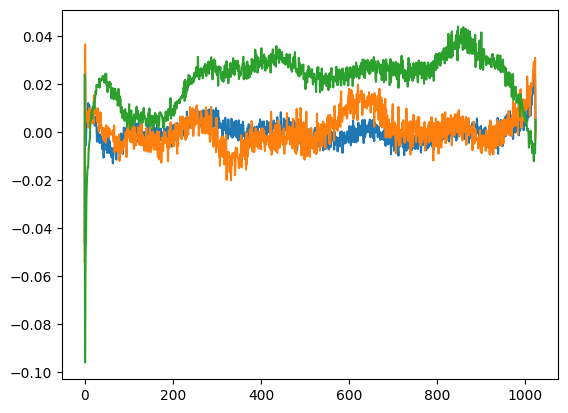

In [36]:
plt.plot(state["transformer.wpe.weight"][:, 150])
plt.plot(state["transformer.wpe.weight"][:, 200])
plt.plot(state["transformer.wpe.weight"][:, 250])

In [39]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a ,", max_length=20, num_return_sequences=5)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a , but what I'm really curious about is who I actually met on my"},
 {'generated_text': "Hello, I'm a , this is good...\n\n- [quote]\n\nLet's"},
 {'generated_text': "Hello, I'm a , and then there's other stuff.\n\nThat said, the most"},
 {'generated_text': "Hello, I'm a , you know my name, and you're saying my face is purple."},
 {'generated_text': "Hello, I'm a , I'm not a bad guy. [18:37] <t"}]

In [41]:
import torch
torch.cuda.is_available()

True